# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [57]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

In [59]:
# Your code here
px.scatter(student_data, x = student_data["Age"], y = student_data["Tardies"], height=500, width=700, title = "Scatter Plot")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### There is a clear trend, it is the younger the students are, the more often they are late to class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [60]:
# Negative correlation is a relationship between two variables in which one variable increases as 
# the other decreases, and viceversa. In this case we have a strong negative correlation of -0.939.
student_data.corr()

Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000

In [61]:
# The covariance measures the relationship between 2 variables. 
# A negative covariance (in this case -45.56) means that the variables move in diff directions.
# The older the student, less tardies he/she will have. 
student_data.cov()

Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444

In [62]:
# Correlation is a metric that goes from 0 to 1 and indicates how the two variables are related: 
# the closer to one, the more related they are. A positive number indicates a positive correlation: if one goes up,
# the other goes up aswell. It indicates proportionality between the two variables.

# Covariance can take any number and indicates how the two variables vary: if they show a big covariance
# means that when one variable varies, the other varies as well. The direction of the variation is indicated by
# the sign: if positive, they vary in the same direction.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = student_data[["Age"]]
y = student_data["Tardies"]
lr.fit(x,y)

LinearRegression()

In [64]:
ordenada_origen = lr.intercept_
slope = lr.coef_[0]

print(f"The interception is {ordenada_origen} and the slope is {slope}")

The interception is 12.888803363135768 and the slope is -0.2428207709159808


In [65]:
student_data["Manual prediction"] = slope*student_data["Age"] + ordenada_origen
student_data["Manual prediction"]

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
Name: Manual prediction, dtype: float64

In [66]:
# Your response here.
results = smf.ols("Tardies ~ Age", data = student_data).fit()
results.summary()

/Users/narea/opt/miniconda3/envs/ironhack/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        17:21:45   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
sns.scatterplot(x = "invited", y = "no_attended", data = party)
plt.plot(X, model.predict(X), color='r');

NameError: name 'X' is not defined

Plot your regression model on your scatter plot.

In [67]:
# Your code here.
px.scatter(student_data, x = student_data["Age"], y = student_data["Tardies"], trendline="ols", trendline_scope="overall", height=500, width=700, title = "Regression ")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

#### There is a strong correlation between the age of the students and the number of times the get late to class. We have a R-squared of 0.88, which is pretty significant. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [68]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [69]:
# Fuels Barrels/Year, Combined MPG and Fuel Cost/Year are the variables most correlated with CO2 Emissions
df_heatmap = vehicles.drop(['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class','City MPG', 'Highway MPG'], axis = 1, inplace = False)
df_heatmap.corr()

Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   

                         CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                                   -0.222300       -0.091913  
Cylinders                               0.752393        0.778153  
Fuel Barrels/Year                       0.986189        0.916208  
Combined MPG                           -0.926229       -0.875185  
CO2 Emission Grams/Mile                 1.000000        0.930865  
Fuel Cost/Year                          0.930865        1.000000

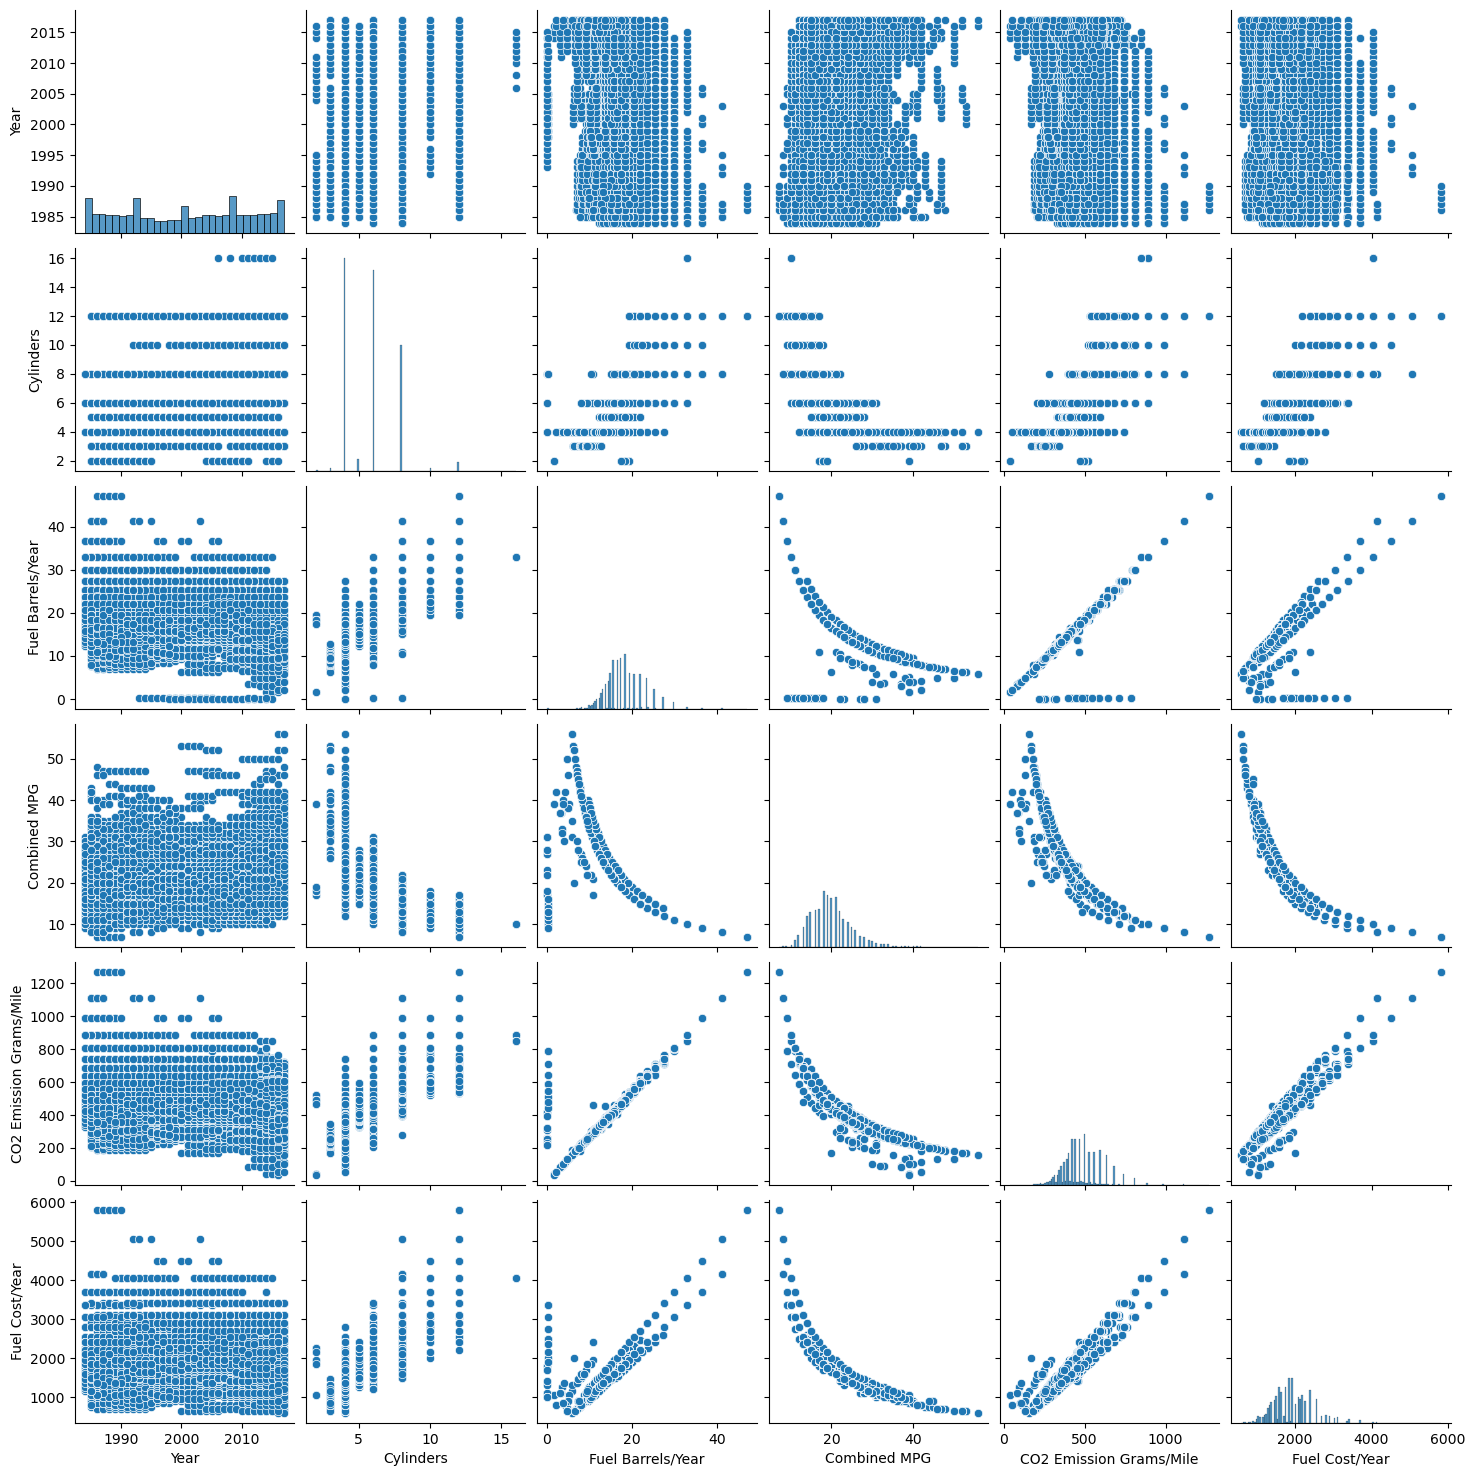

In [70]:
sns.pairplot(df_heatmap)

Text(0.5, 1.0, 'Correlation between CO2 Emissions and different car variables')

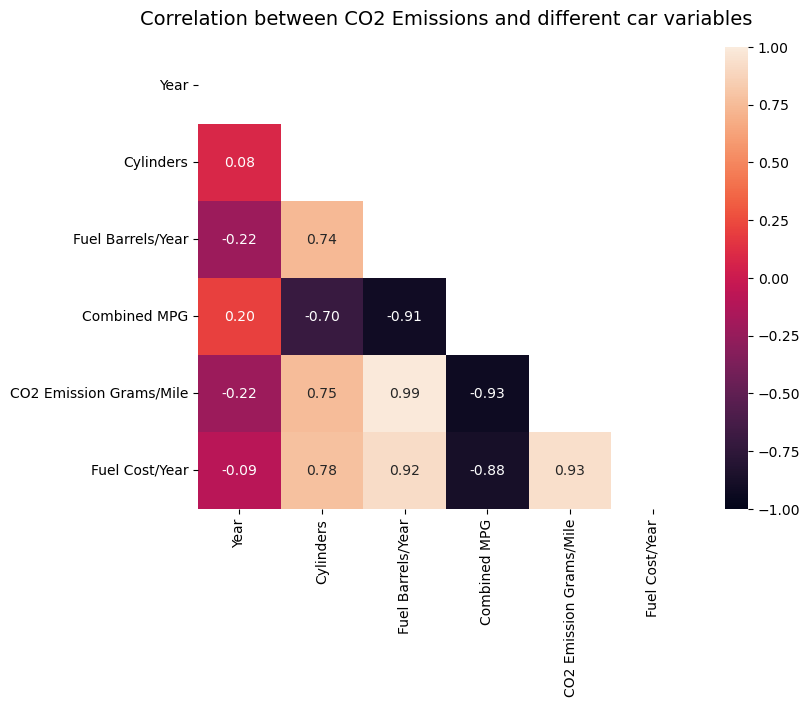

In [71]:
# Let's make it pretty :) 
np.triu(np.ones_like(df_heatmap.corr()))
fig, ax = plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(df_heatmap.corr(), dtype=bool))
heatmap = sns.heatmap(df_heatmap.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f")
heatmap.set_title('Correlation between CO2 Emissions and different car variables', fontdict={'fontsize':14}, pad=16)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [72]:
# I am using an ordinary least squares model. 
results = smf.ols("vehicles['CO2 Emission Grams/Mile'] ~ Cylinders + vehicles['Fuel Cost/Year'] + Year + vehicles['Fuel Barrels/Year'] + vehicles['Combined MPG']", data = vehicles).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [73]:
# We have a high R^2 and adjusted R^2. Also we can see that the Fuel Barrels/Year significantly affects the Emissions of CO2.  
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles['CO2 Emission Grams/Mile']   R-squared:                       0.981
Model:                                             OLS   Adj. R-squared:                  0.981
Method:                                  Least Squares   F-statistic:                 3.687e+05
Date:                                 Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                                         17:22:04   Log-Likelihood:            -1.5173e+05
No. Observations:                                35952   AIC:                         3.035e+05
Df Residuals:                                    35946   BIC:                         3.035e+05
Df Model:                                            5                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       769.8883     19.392     39.702      0.000     731.880     807.897
Cylinders                         1.8788      0.083     22.598      0.000       1.716       2.042
vehicles['Fuel Cost/Year']        0.0323      0.000     67.025      0.000       0.031       0.033
Year                             -0.3206      0.010    -33.060      0.000      -0.340      -0.302
vehicles['Fuel Barrels/Year']    19.0529      0.061    311.600      0.000      18.933      19.173
vehicles['Combined MPG']         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
import plotly.express as px
px.scatter(vehicles, x = vehicles["Fuel Barrels/Year"], y = vehicles["CO2 Emission Grams/Mile"], trendline="ols", height=500, width=700, title = "Scatter Plot")

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [27]:
# Your code here. 
party = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'attended': [1,2,4,4,5,7,8,13]})

In [28]:
party['missed'] = party['invited'] - party['attended']

In [29]:
party

invited  attended  missed
0        1         1       0
1        3         2       1
2        4         4       0
3        6         4       2
4        8         5       3
5        9         7       2
6       11         8       3
7       14        13       1

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [30]:
# Your code here.
px.scatter(party, x = party["invited"], y = party["missed"], trendline="ols", height=500, width=700, title = "Scatter Plot")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

#### It has a positive correlation, the more people you invite, the more will miss (which is kind of obvious)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [31]:
# Your response here. 
# I could take out the time he invited 14 people and 1 missed. 
party.drop(party.index[7], inplace = True)

In [32]:
px.scatter(party, x = party["invited"], y = party["missed"], trendline="ols", height=500, width=700, title = "Scatter Plot")

In [33]:
results = smf.ols("invited ~ missed", data = party).fit()
results.summary()

/Users/narea/opt/miniconda3/envs/ironhack/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                invited   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 28 Feb 2023   Prob (F-statistic):            0.00839
Time:                        13:30:11   Log-Likelihood:                -12.977
No. Observations:                   7   AIC:                             29.95
Df Residuals:                       5   BIC:                             29.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1176      1.152      1.839      0.125      -0.843       5.078
missed         2.4706      0.586      4.213      0.008       0.963       3.978
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.078
Skew:                           0.271   Prob(JB):                        0.583
Kurtosis:                       1.156   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

#### It has a better R^2 and there is a bigger correlation. 

In [ ]:
# Now the R2 is 0.78, which is way bigger than before and indicates a better fitting for the model.
# In addition, now the p-value of the invited people is 0.008, indicating that
# the number of invited people does indeed affect the model